# Establishment

### Adding necessary libraries

In [1]:
import pandas as pd
import numpy as np
import re
import io
import requests

### Loading the dataset

In [2]:
url = "https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv"
info = requests.get(url).content
original_df = pd.read_csv(io.StringIO(info.decode('utf-8')))
df = original_df.copy(deep = True) # creating a copy of the original dataframe

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3258: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# General data review

In [3]:
rows, cols = df.shape # the amount of rows and columns
print(f"MetObjects dataset records: {rows}\nMetObjects dataset attributes: {cols}\n")

MetObjects dataset records: 477804
MetObjects dataset attributes: 54



In [4]:
df.head(10) # checking the first 10 records

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979.0,Coin,One-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980.0,Coin,Ten-dollar Liberty Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
5,67.265.12,False,False,False,6,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/6,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
6,67.265.13,False,False,False,7,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/7,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Birds|Coins,http://vocab.getty.edu/page/aat/300266506|http...,https://www.wikidata.org/wiki/Q5113|https://ww...
7,67.265.14,False,False,False,8,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/8,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Eagles|Men|Profiles,http://vocab.getty.edu/page/aat/300250049|http...,https://www.wikidata.org/wiki/Q2092297|https:/...
8,67.265.15,False,False,False,9,NaN,The American Wing,1967.0,Coin,Two-and-a-Half Dollar Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/9,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
9,1979.486.3,False,False,False,10,NaN,The American Wing,1979.0,Coin,Two-and-a-half-dollar Indian Head Coin,...,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/10,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [5]:
df.tail(10) # checking the last 10 records

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,...,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
477794,53.600.1442,False,False,False,860864,NaN,Drawings and Prints,1953,Print,Landscape with a tree leaning across a road wi...,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
477795,53.600.1438,False,False,False,860865,NaN,Drawings and Prints,1953,Print,Patie and Roger,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
477796,23.112.2892,False,False,True,860866,NaN,Drawings and Prints,1923,Drawing,Stanhope Phaeton #23533,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477797,53.600.1437,False,False,False,860867,NaN,Drawings and Prints,1953,Print,Roger and Jenny,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
477798,53.600.1433,False,False,False,860868,NaN,Drawings and Prints,1953,Print,Madge's attack on Bauldy,...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
477799,23.112.2893,False,False,True,860869,NaN,Drawings and Prints,1923,Drawing,Phaeton #24567,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477800,23.112.2894,False,False,True,860870,NaN,Drawings and Prints,1923,Drawing,Stanhope Phaeton #25538-25539 (#21222),...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477801,53.600.1434,False,False,False,860871,NaN,Drawings and Prints,1953,Print,"Forest landscape with cattle drinking, a woman...",...,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
477802,23.112.2895,False,False,True,860872,NaN,Drawings and Prints,1923,Drawing,Phaeton with folding top,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356
477803,23.112.2896,False,False,True,860873,NaN,Drawings and Prints,1923,Drawing,Stanhope Phaeton,...,NaN,Drawings,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356


In [6]:
df.info() # print number of non-null values, data types of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477804 entries, 0 to 477803
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            477804 non-null  object 
 1   Is Highlight             477804 non-null  bool   
 2   Is Timeline Work         477804 non-null  bool   
 3   Is Public Domain         477804 non-null  bool   
 4   Object ID                477804 non-null  int64  
 5   Gallery Number           51776 non-null   object 
 6   Department               477804 non-null  object 
 7   AccessionYear            474248 non-null  object 
 8   Object Name              476113 non-null  object 
 9   Title                    448619 non-null  object 
 10  Culture                  207379 non-null  object 
 11  Period                   90956 non-null   object 
 12  Dynasty                  23233 non-null   object 
 13  Reign                    11226 non-null   object 
 14  Port

In [7]:
df.describe() # checking some numeric values

,Object ID,Object Begin Date,Object End Date,Metadata Date
count,477804.000000,477804.000000,477804.000000,0.0
mean,387582.167811,1294.064014,1395.139137,NaN
std,237374.736434,1776.237922,1154.075159,NaN
min,1.000000,-400000.000000,-240000.000000,NaN
25%,210119.750000,1529.000000,1582.000000,NaN
50%,371186.500000,1800.000000,1836.000000,NaN
75%,563883.250000,1890.000000,1905.000000,NaN
max,860873.000000,5000.000000,15335.000000,NaN


#### Summarise:

As we may see the dataset consist of 54 columns and 477804 data entries (rows). There are a lot of NaN/null values among data (for example, column `Metadata date` is totally empty). In addition, we can notice some blank spaces in the rows that aren't marked as NaN/null (which may create a problem in the future). Also, most of the attributes have an object data type, which doesn't match to their proper data type. And, as we can see, `Object Begin/End Date` are out of adequate range likewise.

# Data preprocessing

## Looking for some unnecessary data in the dataset

In [8]:
df.isnull().sum().sort_values(ascending=False) # count all entries with null values

Metadata Date              477804
River                      475709
State                      475254
Locus                      470311
County                     469354
Reign                      466578
Locale                     462095
Excavation                 461246
Subregion                  455680
Object Wikidata URL        455539
Dynasty                    454571
Portfolio                  454274
Rights and Reproduction    453606
Region                     446444
City                       445397
Gallery Number             426028
Geography Type             418035
Country                    402053
Period                     386848
Artist Gender              374743
Tags                       277404
Tags AAT URL               277404
Tags Wikidata URL          277404
Culture                    270425
Artist Wikidata URL        260072
Artist ULAN URL            255783
Artist Role                204368
Artist Display Bio         204368
Artist Suffix              202317
Artist End Dat

In [9]:
(df.isna().sum()*100/len(df)).round(2).nlargest(20) # count columns with the biggest percentage (%) of null values

Metadata Date              100.00
River                       99.56
State                       99.47
Locus                       98.43
County                      98.23
Reign                       97.65
Locale                      96.71
Excavation                  96.53
Subregion                   95.37
Object Wikidata URL         95.34
Dynasty                     95.14
Portfolio                   95.08
Rights and Reproduction     94.94
Region                      93.44
City                        93.22
Gallery Number              89.16
Geography Type              87.49
Country                     84.15
Period                      80.96
Artist Gender               78.43
dtype: float64

In [10]:
columns_to_delete = ["Metadata Date", "River", "State", "Locus", "County", "Reign", "Locale", "Excavation", "Subregion", 
                    "Object Wikidata URL", "Dynasty", "Portfolio", "Rights and Reproduction", "Region", "City"]

In [11]:
# remove spaces at the beginning and at the end of all string values & change blank spaces to NA
df = df.apply(lambda x: x.str.strip() if isinstance(x, str) else x).replace('', pd.NA)

In [12]:
if df['Object ID'].is_unique:
    df.set_index('Object ID', inplace=True)
    print(f"Object ID is unique value, so it has been set as an index")
else:
    print(f"Object ID is NOT unique value.")

Object ID is unique value, so it has been set as an index


In [13]:
(df.isna().sum()*100/len(df)).round(2).nlargest(20) # check it one more time

Metadata Date              100.00
River                       99.56
State                       99.47
Locus                       98.43
County                      98.23
Reign                       97.65
Locale                      96.71
Excavation                  96.53
Subregion                   95.37
Object Wikidata URL         95.34
Dynasty                     95.14
Portfolio                   95.08
Rights and Reproduction     94.94
Region                      93.44
City                        93.22
Gallery Number              89.16
Geography Type              87.49
Country                     84.15
Period                      80.96
Artist Gender               78.43
dtype: float64

In [14]:
df.isna().all(axis=1).sum()  # count how many rows are completely empty (all with null values)

0

In [15]:
df.duplicated().sum() # count the number of duplicated rows

0

In [16]:
df.nunique().sort_values() # count all unique entries

Metadata Date                   0
Repository                      1
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Department                     19
State                         104
Geography Type                115
River                         229
AccessionYear                 280
Artist Gender                 284
Subregion                     365
Reign                         389
Dynasty                       403
Excavation                    404
Gallery Number                609
Region                        717
Locale                        867
Country                       946
County                       1093
Classification               1212
Locus                        1380
Rights and Reproduction      1415
Period                       1873
Object End Date              2040
Object Begin Date            2073
City                         2566
Artist Suffix                2729
Portfolio                    3563
Artist Nationa

In [17]:
df["Repository"].unique()

array(['Metropolitan Museum of Art, New York, NY'], dtype=object)

In [18]:
columns_to_delete.append("Repository")

In [19]:
df = df.drop(columns=columns_to_delete) # delete unnecessary columns

In [20]:
# df = df.dropna(how='all')          # delete rows with all null values
# df = df.dropna(axis=1,how='all')   # delete columns with all null values
# df.drop_duplicates(inplace=True)   # delete duplicated rows (in case if there is any) - the first occurence is kept

In [21]:
rows, cols = df.shape # the amount of rows and columns
print(f"MetObjects dataset records: {rows}\nMetObjects dataset attributes: {cols}\n")

MetObjects dataset records: 477804
MetObjects dataset attributes: 37



#### Summarise:

After short examination may be revealed that there are a lot of NaN values among all dataframe. That is why I decided to remove 15 columns (`columns_to_delete`) that used to have more than 90% of missing values. Meanwhile, I revealed that there isn't any row with all null or duplicated values. I also noticed that there are columns, which consist of a few different values (so these columns have to have another (categorical) data type). Furthermore, `Repository` column contains a single not null value in each row - *Metropolitan Museum of Art, New York, NY*. It is pointless to store the same value for all entries in the column, so I decided to remember this fact and then delete this and other unnecessary columns from the dataframe.


## Identification of the problems in dataset

### Data consistency

#### Object Name

In [22]:
# unique Object Name values with the number of its repetition
df.groupby(['Object Name'])['Object Name'].count().nlargest(20)

# pd.DataFrame(data=df.groupby(['Object Name'])['Object Name'].count(), columns=['Object Name'])
# df['Object Name'].value_counts().nlargest(20).plot(kind='bar')

Object Name
Print                                   99439
Photograph                              28458
Drawing                                 25788
Book                                    13393
Fragment                                 9566
Kylix fragment                           8927
Piece                                    8630
Painting                                 5932
Negative                                 5928
Bowl                                     3617
Vase                                     3162
Figure                                   3030
Dress                                    2566
Baseball card                            2505
Baseball card, print                     2463
Plate                                    2230
Books Prints Ornament & Architecture     2127
Baseball card, photograph                2099
Ensemble                                 2090
Medal                                    1943
Name: Object Name, dtype: int64

In [23]:
# leaving some records that aren't prohibited to use (by authors)
df = df[df['Object Name'].str.contains("DO NOT USE THIS RECORD") != True]
print(f"The number of deleted rows: {original_df.shape[0] - df.shape[0]}")

The number of deleted rows: 4


In [24]:
# df['Object Name'] = df['Object Name'].str.replace('[^a-zA-Z0-9]+', '') # delete everything except for alphabetical/numeric values

# change all entries to lowecase
df['Object Name'] = df['Object Name'].str.lower()

# erasing some authors's comments
df['Object Name'] = df['Object Name'].str.replace(" check date and identification !!",'')

df['Object Name'] = df['Object Name'].str.replace("&",'and') # & -> and
df['Object Name'] = df['Object Name'].str.replace("(\")|(\')",'', regex=True) # erase " '
df['Object Name'] = df['Object Name'].str.replace("\'s",'', regex=True) # example: ram's -> ram
df['Object Name'] = df['Object Name'].str.replace(" a ",' ') # erase a
df['Object Name'] = df['Object Name'].str.replace("\?|\(\?\)|\;",'', regex=True) # erase ? (?) ;

df['Object Name'] = df['Object Name'].str.replace(" \- ",' & ', regex=True) # temporary change - (surrounded with spaces) to &
df['Object Name'] = df['Object Name'].str.replace("\-",' ', regex=True) # erase - (example: Hathor-head -> Hathor head, Ba-bird -> Ba bird)
df['Object Name'] = df['Object Name'].str.replace(" & ",' \- ', regex=True) # write back - (surrounded with spaces)

# rewrite plural form to the singular
df['Object Name'] = df['Object Name'].str.replace("prints",'print')
df['Object Name'] = df['Object Name'].str.replace("drawings",'drawing')
df['Object Name'] = df['Object Name'].str.replace("books",'book')
df['Object Name'] = df['Object Name'].str.replace("ornaments",'ornament')
df['Object Name'] = df['Object Name'].str.replace("photographs",'photograph')
df['Object Name'] = df['Object Name'].str.replace("albums",'album')
df['Object Name'] = df['Object Name'].str.replace("candlesticks",'candlestick')
df['Object Name'] = df['Object Name'].str.replace("fragments",'fragment')
df['Object Name'] = df['Object Name'].str.replace("cruets",'cruet')
df['Object Name'] = df['Object Name'].str.replace("leaves",'leaf')
df['Object Name'] = df['Object Name'].str.replace("ambrotypes",'ambrotype')

# correct some grammar mistakes
df['Object Name'] = df['Object Name'].str.replace("architecturedrawing",'architecture drawing')
df['Object Name'] = df['Object Name'].str.replace("Harpokrates",'Harpocrates')
df['Object Name'] = df['Object Name'].str.replace("sokar",'seker')
df['Object Name'] = df['Object Name'].str.replace("hippo",'hippopotamus')
df['Object Name'] = df['Object Name'].str.replace("deity",'diety')

# change blank spaces to NA
df['Object Name'] = df['Object Name'].str.strip().replace('', pd.NA)

In [25]:
df.groupby(['Object Name'])['Object Name'].count().nlargest(20)

Object Name
print                                   99714
photograph                              28666
drawing                                 25939
book                                    13802
kylix fragment                          10138
fragment                                 9735
piece                                    8634
painting                                 5932
negative                                 5928
book print ornament and architecture     3622
bowl                                     3622
vase                                     3197
figure                                   3051
dress                                    2578
baseball card                            2505
baseball card, print                     2463
plate                                    2261
print ornament and architecture          2242
baseball card, photograph                2099
ensemble                                 2094
Name: Object Name, dtype: int64

In [26]:
# df['Object Name'].unique().shape[0]

old_categories = original_df.groupby(['Object Name']).size().count()
new_categories = df.groupby(['Object Name']).size().count()
print("*** Object Name ***\n")
print(f"Number of categories before changes: {old_categories}\nNumber of categories after changes: {new_categories}\n")
print(f"Difference (reduced categories): {old_categories - new_categories} ({((old_categories - new_categories)/old_categories * 100).round(2)}%)")

*** Object Name ***

Number of categories before changes: 28449
Number of categories after changes: 26672

Difference (reduced categories): 1777 (6.25%)


In [27]:
df['Object Name'].str.contains('print', case = False).sum() # count how many times 'print' is in the column

119221

#### Summarise:

`Object Name` column has a lot of consistency problems, such as:
- the same words (or their parts) are written in lowercase or uppercase
- there are some blank spaces or different unnecessary signs among the words
- some words are combined of a few ones (so the space is missing)
- the same words may be in plural or singular form
- some words have spelling mistakes

These problems we particularly solved in the example above and reduced number of categories for 6%. However, there are even more similar problems that we may check. Mostly, such data inconsistency person have to check manually, but there are some additional methods of how to do it:
- a lot of rows consist of a few categories (for example word *'print'* ocurts much more time than in its own category); so, we may divide our column to a few ones (depending on the category) and then mark all categories that were mentioned in one row
- also, we may change the order of different categories in one row
- we may use some spelling checker to correct some small spelling mistakes (for example library `textblob` has method `Word.spellcheck()`)

#### Artist Gender

In [28]:
# unique Artist Gender values with the number of its repetition
df.groupby(['Artist Gender'])['Artist Gender'].count().nlargest(20)

Artist Gender
|                56855
||               21063
Female            8708
|||               6245
Female|           2680
||||              2169
|Female           1009
|||||              790
||||||             679
Female||           459
|||||||            300
|Female|           285
||Female           229
Female|Female      199
||||||||           137
|||||||||           96
||||||||||          77
|||||||||||         72
|Female||           62
Female|||           60
Name: Artist Gender, dtype: int64

In [29]:
# check how many females are in the column
df['Artist Gender'].str.contains('Female', case = False).sum() # case insensitive

14281

In [30]:
# check how many males are in the column
df[df['Artist Gender'].isin(["[^(a-zA-Z)*]((m|M)ale)+"])]

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Medium,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Tags,Tags AAT URL,Tags Wikidata URL
Object ID,,,,,,,,,,,,,,,,,,,,,


In [31]:
# if female is mentioned in the row - rewrite the whole row to the True value, else NA 
df['Artist Gender'] = df['Artist Gender'].apply(lambda x: True if 'Female' in str(x) else pd.NA)

In [32]:
# rename column, so in the future it will mark bollean column
df.rename(columns = {'Artist Gender':'Artist Is Female'}, inplace = True)

In [33]:
df['Artist Is Female'].unique() # different values check

array([<NA>, True], dtype=object)

#### Summarise:

As we can see the whole column `Artist Gender` consist of a single value (*'Female'*) with a different combination of `|` sign. Obviously, the sign doesn't have an influence to the `Artist Gender`, so all of these signs had been deleted and column consistency was established. The strange fact is that not a single male artist occurts among such a bid dataframe.

#### Department

In [34]:
df["Department"].unique() # write all unique categories

array(['The American Wing', 'European Sculpture and Decorative Arts',
       'Modern and Contemporary Art', 'Arms and Armor', 'Medieval Art',
       'Asian Art', 'Islamic Art', 'Costume Institute',
       'Arts of Africa, Oceania, and the Americas', 'Drawings and Prints',
       'Greek and Roman Art', 'Photographs', 'Ancient Near Eastern Art',
       'Egyptian Art', 'European Paintings', 'Robert Lehman Collection',
       'The Cloisters', 'Musical Instruments', 'The Libraries'],
      dtype=object)

In [35]:
# unique Department values with the number of its repetition
df.groupby("Department").size().reset_index(name="Count").sort_values("Count", ascending=False)

,Department,Count
5,Drawings and Prints,167152
8,European Sculpture and Decorative Arts,42934
14,Photographs,37192
3,Asian Art,36813
9,Greek and Roman Art,33750
4,Costume Institute,31412
6,Egyptian Art,27962
16,The American Wing,18412
10,Islamic Art,15473
12,Modern and Contemporary Art,14241


#### Summarise:

As we may notice `Department` column is of categorical type (19 different categories). Each of its unique category has no mistakes/repetition in compare to others, so the whole column may be considered as a consistent one.

#### Geography Type

In [36]:
df["Geography Type"].unique() # write all unique categories

array([nan, 'Made in', 'Probably made in',
       'Possibly made in|Possibly made in', 'Made in|Probably made in',
       'Possibly made in', 'Made in|Made in',
       'Probably made in|Possibly made in', '(none assigned)',
       'Made in|Possibly made in',
       'Made in|Probably made in|Probably made in',
       'Made in|Object place', 'Made in|(none assigned)',
       'Possibly made in|Possibly made in|Possibly made in',
       'Possibly made in|Probably made in',
       'Possibly made in|Possibly made in|Possibly made in|Possibly made in',
       'Probably made in|Possibly made in|Possibly made in|Possibly made in',
       'Possibly made in|Possibly made in|Country of Origin',
       'Probably made in|Probably made in', 'From', 'Attributed to',
       'Probably from', 'Original from', 'Possibly from',
       'Country of Origin', 'Formerly considered made in|Made in',
       'Made in|Made for', 'Formerly considered made in|Possibly made in',
       'Formerly considered made in|Pro

In [37]:
# erase everything that is located after | sign
df['Geography Type'] = df['Geography Type'].str.replace("(((\||\/)[a-zA-Z0-9_ ]*)*)",'', regex=True)

df['Geography Type'] = df['Geography Type'].str.replace("(none assigned)",'') # erase authors comentars
df['Geography Type'] = df['Geography Type'].str.replace("(\(\))*",'', regex=True) # erase ()
df['Geography Type'] = df['Geography Type'].str.strip().replace('', pd.NA) # rewrite empty spaces to NA

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [38]:
new_types = df.groupby(['Geography Type']).size().count()

print(f"The number of different geography types: {new_types}")
df["Geography Type"].unique()

The number of different geography types: 23


array([nan, 'Made in', 'Probably made in', 'Possibly made in', <NA>,
       'From', 'Attributed to', 'Probably from', 'Original from',
       'Possibly from', 'Country of Origin',
       'Formerly considered made in', 'Made for', 'Depicted',
       'Presumably from', 'Found', 'Said to be from', 'Mint',
       'Probably originally from', 'Excavated in', 'Decorated in',
       'Object place', 'Original', 'Said to be found in', 'Designed in'],
      dtype=object)

In [39]:
# rewrite words with the same meaning to a consistent form
df['Geography Type'] = df['Geography Type'].str.replace("(Probably|Possibly|Formerly considered) made in",'Made in', regex=True)
df['Geography Type'] = df['Geography Type'].str.replace("(Probably|Original|Possibly|Presumably|Said to be|Probably originally) from",'From', regex=True)
df['Geography Type'] = df['Geography Type'].str.replace("Said to be found in",'Found')

In [40]:
new_types = df.groupby(['Geography Type']).size().count()

print(f"The number of different geography types: {new_types}")
df["Geography Type"].unique()

The number of different geography types: 13


array([nan, 'Made in', <NA>, 'From', 'Attributed to', 'Country of Origin',
       'Made for', 'Depicted', 'Found', 'Mint', 'Excavated in',
       'Decorated in', 'Object place', 'Original', 'Designed in'],
      dtype=object)

In [41]:
old_types = original_df.groupby(['Object Name']).size().count()
print("*** Geography Type ***\n")
print(f"Number of categories before changes: {old_types}\nNumber of categories after changes: {new_types}\n")
print(f"Difference (reduced categories): {old_types - new_types} ({((old_types - new_types)/old_types * 100).round(2)}%)")

*** Geography Type ***

Number of categories before changes: 28449
Number of categories after changes: 13

Difference (reduced categories): 28436 (99.95%)


#### Summarise:

As we can see `Geography Type` column has a lot of consistency problems, as some rows may contain a few different categories at the same time, some of these categories basically mean the same (for example *'Probably  made in'* and *'Possibly made in'*). There are a lot of different strategies how to solve it - I choosed the next one: select the first category that occurs in the row (it has 'bigger power' as it was mentioned first) and delete another ones. I also simplified some categories to the easiest (basic) content (for example *'Possibly made in'* -> *'Made in'*).

There are even more columns with consistency problems (for example `Period`).

In [42]:
df["Period"].unique()

array([nan, 'Edo period (1615–1868)', 'Qing dynasty (1644–1911)', ...,
       'Tran Dynasty (1225–1400)', 'Taishō (1912–26) period',
       'Early Cypriot III–Middle Cypriot'], dtype=object)

### Data integrity

#### Artist Begin and End Dates

In [43]:
df[["Artist Begin Date", "Artist End Date"]] # check ou the column

,Artist Begin Date,Artist End Date
Object ID,,
1,1794,1869
2,1785,1844
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
...,...,...
860869,,
860870,,
860871,1731,1809


In [44]:
# divide different years (in the same row) due to the separator

# select the oldest begin year
df["Artist Begin Date"] = df["Artist Begin Date"].str.split("|")
df["Artist Begin Date"] = df[pd.notnull(df["Artist Begin Date"])]["Artist Begin Date"].apply(lambda x: min(x))

# select the newest end year
df["Artist End Date"] = df["Artist End Date"].str.split("|")
df["Artist End Date"] = df[pd.notnull(df["Artist End Date"])]["Artist End Date"].apply(lambda x: max(x))

In [45]:
# rewrite some blank spaces to NA
df['Artist Begin Date'] = df['Artist Begin Date'].str.strip().replace('', pd.NA)
df['Artist End Date'] = df['Artist End Date'].str.strip().replace('', pd.NA)

In [46]:
# convert begin and end dates to the right format
# invalid input change to NaT value
df['Artist Begin Date'] = pd.to_datetime(df['Artist Begin Date'], format='%Y', errors = 'coerce').dt.year
df['Artist End Date'] = pd.to_datetime(df['Artist End Date'], format='%Y', errors = 'coerce').dt.year

In [47]:
# delete all years that are out of adequate range (0, 2022)
df.loc[pd.to_numeric(df['Artist Begin Date'], errors = 'coerce').between(0, pd.datetime.now().year, inclusive=True) == False, 'Artist Begin Date'] = np.nan
df.loc[pd.to_numeric(df['Artist End Date'], errors = 'coerce').between(0, pd.datetime.now().year, inclusive=True) == False, 'Artist End Date'] = np.nan

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
old_b_dates = original_df['Artist Begin Date'].notnull().sum()
new_b_dates = df['Artist Begin Date'].notnull().sum()
print("*** Artist Begin Date ***\n")
print(f"Number of existing dates before changes: {old_b_dates}\nNumber of existing dates after changes: {new_b_dates}")
print(f"Difference (deleted date records): {old_b_dates - new_b_dates} ({((old_b_dates - new_b_dates)/old_b_dates * 100).round(2)}%)")

old_e_dates = original_df['Artist End Date'].notnull().sum()
new_e_dates = df['Artist End Date'].notnull().sum()
print("\n*** Artist End Date ***\n")
print(f"Number of existing dates before changes: {old_e_dates}\nNumber of existing dates after changes: {new_e_dates}")
print(f"Difference (deleted date records): {old_e_dates - new_e_dates} ({((old_e_dates - new_e_dates)/old_e_dates * 100).round(2)}%)")

*** Artist Begin Date ***

Number of existing dates before changes: 275535
Number of existing dates after changes: 161655
Difference (deleted date records): 113880 (41.33%)

*** Artist End Date ***

Number of existing dates before changes: 275535
Number of existing dates after changes: 181299
Difference (deleted date records): 94236 (34.2%)


In [49]:
# check if begin date is older than the end date (if not - difference will be negative)
df['Artist Date Difference'] = (df['Artist End Date'] - df['Artist Begin Date'])#.astype('timedelta64[D]')
#df['Artist Date Difference'] = pd.to_timedelta((df['Artist End Date'] - df['Artist Begin Date'])*365, unit="D", errors = 'coerce')
df['Artist Date Difference'].unique()

array([ 75.,  59.,  nan,  50.,  69.,  18.,  47.,  30.,  70.,  79.,  25.,
        23.,  84.,  85.,  24.,  53.,  62.,  39.,  54.,  68.,  55.,  56.,
        35.,  27.,  42., 100.,  63.,  20.,  26.,  40.,  51.,  92.,  80.,
         6.,  61.,  96.,  89.,  71.,  17.,  81.,  66.,  77., 118.,  58.,
         0.,  64.,  90.,  72.,  32.,  76.,  34.,  46.,  36.,  11.,  14.,
        60.,  78.,  67.,  13.,  73.,  87.,  94.,   7., 155.,  19.,  28.,
        74.,  88.,   3., 102.,  91.,  86., 105.,  93.,  33.,   9., 209.,
        37.,  22.,  45.,  44.,  83.,   5.,  16.,  82.,  41.,  65.,  57.,
       113.,  29.,  12., 121.,   8.,  31.,  15.,   4.,  21., 112.,  49.,
       175.,  38.,  52.,  48.,  95., 119., 139.,   2., 117.,  97., 130.,
       129., 124., 144.,  98., 120., 111., 200.,  43., 110., 103.,   1.,
       170., 164., 203.,  10., 116., 107., 108., 140., 101., 182., 191.,
       132., 104., 157.,  99., 106., 137., 128., 115., 122., 187., 165.,
       150., 114., 141., 134., 126., 123., 131., 21

In [50]:
df['Artist Date Difference'].lt(0).sum() # check the negative values

0

#### Summarise:

In this step I checked if `Artist Begin Date` and `Artist End Date` contain meaningful values in compate to each other. In each column I converted date range (so it has realistic value) and then counted the difference between mentioned columns. These values were stored in new `Artist Date Difference` column. Due to the fact that all of the values were positive, we may prove that all of the `Artist Begin Date` are older than `Artist End Date`. The same check we may perform for `Object Begin Date` and `Object End Date` columns.

#### Artist Nationality, Culture and Country

In [51]:
df["Culture"].unique()

array([nan, 'Mexican', 'Guatemalan', ...,
       'India, Kolkata (formerly Calcutta)', 'Western India, Karnataka',
       'India, Madurai, Tamil Nadu'], dtype=object)

In [52]:
df["Country"].unique()

array([nan, 'Mexico', 'Guatemala', 'United States', 'England', 'Spain',
       'United States|England', 'Netherlands',
       'United States|United States', 'France', 'Canada',
       'United States|France', 'England|France', 'China', 'Italy',
       'Japan', 'Germany', 'Netherlands|Netherlands', 'Czech Republic',
       'England|Ireland', 'Ireland|United States', 'Venezuela',
       'England|Netherlands', 'England|Belgium', 'France|Italy',
       'Bermuda', 'Ireland', 'India', 'England|United States',
       'United States|United States|United States',
       'France|NEW ZEALAND ROTORUA WHAKAREWAREWA',
       'China|NEW ZEALAND ROTORUA WHAKAREWAREWA', 'Germany|Italy',
       'Lisez et propagez nos Annales: "L\'Immacul‚e"',
       'France|Bernard Turner', 'France|Harold Copping',
       'Czech Republic|England', 'Belgium|France',
       'Belgium|England|France', 'United States|Germany',
       'France|Germany', 'Scotland', 'Germany|Czech Republic', 'Holland',
       'England|England', 

In [53]:
df["Artist Nationality"].unique()

array(['American', ' ', nan, ...,
       ' | | | | | | | | | | | | | | | | | | | | | | | | | | | | | ',
       ' | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | ',
       ' | | | | | | | | | | | | | | | | | | | | | | | | | | | | | | '],
      dtype=object)

In [54]:
df[df["Artist Nationality"].str.contains("(\|)+", regex=True) == False] # unique values beside '|' sign

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,...,Dimensions,Credit Line,Geography Type,Country,Classification,Link Resource,Tags,Tags AAT URL,Tags Wikidata URL,Artist Date Difference
Object ID,,,,,,,,,,,,,,,,,,,,,
1,1979.486.1,False,False,False,NaN,The American Wing,1979.0,coin,One-dollar Liberty Head Coin,NaN,...,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,NaN,75.0
2,1980.264.5,False,False,False,NaN,The American Wing,1980.0,coin,Ten-dollar Liberty Head Coin,NaN,...,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,NaN,59.0
10,1979.486.3,False,False,False,NaN,The American Wing,1979.0,coin,Two-and-a-half-dollar Indian Head Coin,NaN,...,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/10,NaN,NaN,NaN,50.0
11,1979.486.2,False,False,False,NaN,The American Wing,1979.0,coin,Two-and-a-half-dollar Liberty Head Coin,NaN,...,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/11,NaN,NaN,NaN,59.0
12,1979.486.7,False,False,False,NaN,The American Wing,1979.0,coin,Twenty-dollar Liberty Head Coin,NaN,...,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search/12,NaN,NaN,NaN,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860869,23.112.2893,False,False,True,NaN,Drawings and Prints,1923,drawing,Phaeton #24567,NaN,...,Sheet: 13 1/2 × 22 1/2 in. (34.3 × 57.2 cm),"Gift of William Brewster, 1923",NaN,NaN,Drawings,http://www.metmuseum.org/art/collection/search...,Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,NaN
860870,23.112.2894,False,False,True,NaN,Drawings and Prints,1923,drawing,Stanhope Phaeton #25538-25539 (#21222),NaN,...,Sheet: 13 in. × 22 1/4 in. (33 × 56.5 cm),"Gift of William Brewster, 1923",NaN,NaN,Drawings,http://www.metmuseum.org/art/collection/search...,Carriages,http://vocab.getty.edu/page/aat/300185335,https://www.wikidata.org/wiki/Q235356,NaN
860871,53.600.1434,False,False,False,NaN,Drawings and Prints,1953,print,"Forest landscape with cattle drinking, a woman...",NaN,...,Plate: 11 5/8 × 7 5/8 in. (29.6 × 19.4 cm),"Harris Brisbane Dick Fund, 1953",NaN,NaN,Prints,http://www.metmuseum.org/art/collection/search...,NaN,NaN,NaN,78.0


#### Summarise:

As we may notice `Artist Nationality`, `Culture` and `Country` columns have a lot of things in common. It is obviously that artist's nationality and culture depend on the country of origin, so they have to have similar values (which mean the same thing). For the integrity check we have to compare all of these columns, rewrite the difference among them or add missing values due to the surrounding/dominant columns.

### Data types

In [55]:
df.dtypes # check all column datatypes

Object Number              object
Is Highlight                 bool
Is Timeline Work             bool
Is Public Domain             bool
Gallery Number             object
Department                 object
AccessionYear              object
Object Name                object
Title                      object
Culture                    object
Period                     object
Constituent ID             object
Artist Role                object
Artist Prefix              object
Artist Display Name        object
Artist Display Bio         object
Artist Suffix              object
Artist Alpha Sort          object
Artist Nationality         object
Artist Begin Date         float64
Artist End Date           float64
Artist Is Female           object
Artist ULAN URL            object
Artist Wikidata URL        object
Object Date                object
Object Begin Date           int64
Object End Date             int64
Medium                     object
Dimensions                 object
Credit Line   

In [56]:
df.dtypes.value_counts()

object     30
float64     3
bool        3
int64       2
dtype: int64

In [57]:
# correct missing (NaN, NaT) values
df.replace({pd.NaT:pd.NA, None:pd.NA, np.nan:pd.NA}, inplace=True)

Due to the values that are placed in the columns we change the next datatypes:

In [58]:
df["Artist Is Female"] = df["Artist Is Female"].fillna(False) # set False, as it wasn't marked as female

# setting columns with 2 values boolean datatype
df = df.astype({'Is Highlight':'bool','Is Timeline Work':'bool', 'Is Public Domain':'bool', "Artist Is Female":'bool'})

# setting columns (that haven't got a lot of unique values in compare to the number of rows) category datatype
df = df.astype({'Department':'category', 'Object Name':'category', 'Culture':'category', 'Period':'category', 
'Artist Role':'category', 'Artist Prefix':'category', 'Artist Suffix':'category', 'Artist Nationality':'category',
'Geography Type':'category', 'Country':'category', 'Classification':'category'})

# setting digital columns numeric datatype
df['Object Number'] = pd.to_numeric(df['Object Number'], errors='coerce')
df['Gallery Number'] = pd.to_numeric(df['Gallery Number'], errors='coerce')
df['Constituent ID'] = pd.to_numeric(df['Constituent ID'], errors='coerce')

# setting columns with dates date datatype
date_columns = ["AccessionYear", "Artist Begin Date", "Artist End Date", "Object Begin Date", "Object End Date", "Object Date"]
df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce')

# setting column (that means the difference between end and begin dates) timedelta datatype
df["Artist Date Difference"] = pd.to_timedelta((pd.to_numeric(df['Artist Date Difference'], errors='coerce'))*365, unit='D', errors = 'coerce')

In [59]:
df.dtypes

Object Number                     float64
Is Highlight                         bool
Is Timeline Work                     bool
Is Public Domain                     bool
Gallery Number                    float64
Department                       category
AccessionYear              datetime64[ns]
Object Name                      category
Title                              object
Culture                          category
Period                           category
Constituent ID                    float64
Artist Role                      category
Artist Prefix                    category
Artist Display Name                object
Artist Display Bio                 object
Artist Suffix                    category
Artist Alpha Sort                  object
Artist Nationality               category
Artist Begin Date          datetime64[ns]
Artist End Date            datetime64[ns]
Artist Is Female                     bool
Artist ULAN URL                    object
Artist Wikidata URL               

## Abnormalities in the dataset

### Outliers

In [60]:
num_data = df.select_dtypes(include = ['float64']).columns # select numerical columns

array([[<AxesSubplot:title={'center':'Object Number'}>,
        <AxesSubplot:title={'center':'Gallery Number'}>,
        <AxesSubplot:title={'center':'AccessionYear'}>],
       [<AxesSubplot:title={'center':'Constituent ID'}>,
        <AxesSubplot:title={'center':'Artist Begin Date'}>,
        <AxesSubplot:title={'center':'Artist End Date'}>],
       [<AxesSubplot:title={'center':'Object Date'}>,
        <AxesSubplot:title={'center':'Object Begin Date'}>,
        <AxesSubplot:title={'center':'Object End Date'}>]], dtype=object)

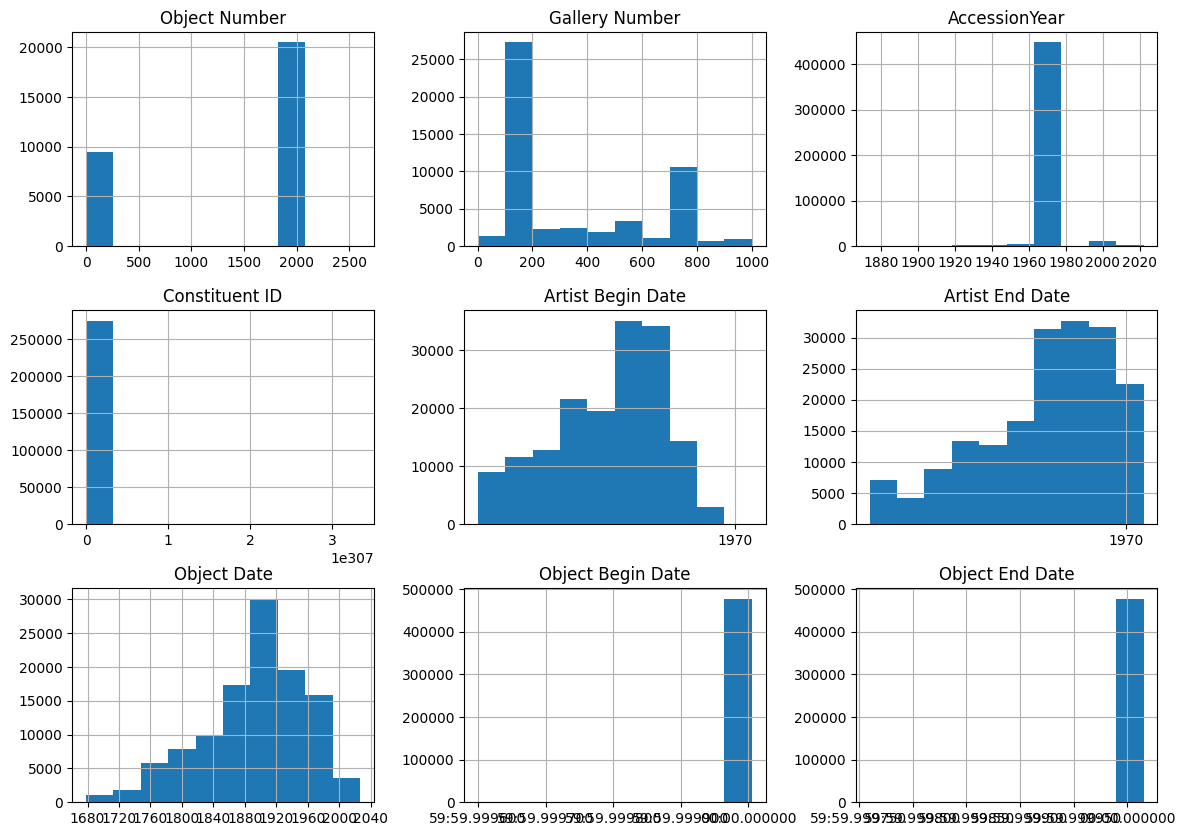

In [61]:
df.hist(figsize=(14,10)) # plot the histogram of all possible columns

In [62]:
# define 2 methods to check the outliers

def outliers_iqr(df):
    Q1, Q3 = df.quantile(0.25), df.quantile(0.75)
    IQR = Q3 - Q1
    return df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]

def outliers_std(df):
    mean, std = df.mean(), df.std()
    lower, upper = mean - std * 3, mean + std * 3 
    return df[(df < lower) | (df > upper)]

In [63]:
out_iqr = outliers_iqr(df[num_data])
out_std = outliers_std(df[num_data])

print(f"Number of outliers by using IQR method:\n{out_iqr.count()}")
print(f"\n\nNumber of outliers by using standard deviation method:\n{out_std.count()}\n")

Number of outliers by using IQR method:
Object Number         0
Gallery Number        0
Constituent ID    63908
dtype: int64


Number of outliers by using standard deviation method:
Object Number     0
Gallery Number    0
Constituent ID    0
dtype: int64

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/nanops.py:892: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


Outliers may be checked only for numerical values (unfortunately, in out case there isn't a lot of them). A few histograms were shown to see any grafical representation, but, obviously, it wasn't the best way to define outliers.

In the next step we defined 2 different functions for counting outliers (IQR or standard deviation methods). As we may notice, upper and lower outliers presents just in `Constituent ID` column (while counting with the use of IQR method). So, in the next step we will try to rewrite them with 90 and 10 quantile...

In [64]:
Q1 = df["Constituent ID"].quantile(0.25)
Q3 = df["Constituent ID"].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

# another alternative: p50 = df["Constituent ID"].quantile(0.50)
p90 = df["Constituent ID"].quantile(0.90)
p10 = df["Constituent ID"].quantile(0.10)
for i in (df["Constituent ID"][df["Constituent ID"]<lower]).index:
    df["Constituent ID"][i] = p10 # p50
for i in (df["Constituent ID"][df["Constituent ID"]>upper]).index:
    df["Constituent ID"][i] = p90 # p50

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


### Missing data

In [65]:
# count how many columns may be missed in one row
df.isnull().sum(axis=1).unique() # .sort_values(ascending=False)

array([10, 24, 21, 20,  2,  6,  8,  5, 18,  7, 12, 23, 17,  9, 11,  4, 13,
       25, 19, 22,  3, 16, 14, 15, 26, 27, 28])

In [66]:
# delete rows that have more than 25 empty columns values
df = df[df.isnull().sum(axis=1) < 25]

In [67]:
del_rows = original_df.shape[0] - df.shape[0]
print(f"Number of deleted rows: {del_rows} ({round(del_rows/original_df.shape[0]*100)}%)")

Number of deleted rows: 348 (0%)


In [68]:
(df.isna().sum()*100/len(df)).round(2).nsmallest(20) # check columns with the least missing values (in %)

Is Highlight            0.00
Is Timeline Work        0.00
Is Public Domain        0.00
Department              0.00
Artist Is Female        0.00
Object Begin Date       0.00
Object End Date         0.00
Link Resource           0.00
Credit Line             0.09
Object Name             0.35
AccessionYear           0.70
Medium                  1.45
Title                   6.11
Dimensions             15.72
Classification         16.35
Constituent ID         42.29
Artist Prefix          42.29
Artist Display Name    42.29
Artist Alpha Sort      42.29
Artist Nationality     42.29
dtype: float64

In [69]:
df.drop('Object Number', axis=1, inplace=True) # drop the column that have more that 90% of missing data

In [70]:
# drop some rows with NA
df = df[df['Credit Line'].notna()]
df = df[df['Medium'].notna()]
df = df[df['Title'].notna()]

In [71]:
del_rows = original_df.shape[0] - df.shape[0] - del_rows
print(f"Number of deleted rows: {del_rows} ({round(del_rows/original_df.shape[0]*100)}%)")

Number of deleted rows: 36096 (8%)


In [72]:
# filling missing data with the most common category
df["Classification"] = df["Classification"].fillna(df["Classification"].value_counts().index[0])
df["Object Name"] = df["Object Name"].fillna(df["Object Name"].value_counts().index[0])

# filling missing data with an average year
accession_year = pd.to_numeric(pd.DatetimeIndex(df[df['AccessionYear'].isnull() == False]['AccessionYear']).year, errors='coerce')
df["AccessionYear"] = df["AccessionYear"].fillna(round(np.mean(accession_year)))

# df = df.fillna(df.median(numeric_only=True))

In [73]:
(df.isna().sum()*100/len(df)).round(2).nsmallest(20)

Is Highlight            0.00
Is Timeline Work        0.00
Is Public Domain        0.00
Department              0.00
AccessionYear           0.00
Object Name             0.00
Title                   0.00
Artist Is Female        0.00
Object Begin Date       0.00
Object End Date         0.00
Medium                  0.00
Credit Line             0.00
Classification          0.00
Link Resource           0.00
Dimensions             16.00
Constituent ID         39.96
Artist Prefix          39.96
Artist Display Name    39.96
Artist Alpha Sort      39.96
Artist Nationality     39.96
dtype: float64

#### Summarise:

The whole dataframe has lots of missing values. Some of the columns were dropped before (in early preprocessing) and some of them now. Finally, we ended un with 37 columns. Still, most of them contain more then 40% of missing data. On the contrary, there are a few (8) columns without any missing value (see above).

I decided to analyze some columns with the smallest percentage of missing data. Some of these values I changed to the mode/average value (you might also use median, KNN, ...), but some of the rows were deleted. The rows with a hight amount of missing values were also dropped.

# Chosen features

## "Medium"

In [74]:
df["Medium"].nunique() # number of unique records

58647

In [75]:
df.groupby("Medium").size().reset_index(name="Count").sort_values("Count", ascending=False)

,Medium,Count
46865,Terracotta,23305
8566,Commercial color lithograph,17548
13559,Etching,16814
12725,Engraving,11425
17507,Gelatin silver print,10338
...,...,...
22242,Hanging scroll remounted as a panel; ink on paper,1
22243,Hanging scroll remounted as a two-panel foldin...,1
22244,Hanging scroll remounted as album leaf; ink on...,1
22245,Hanging scroll remounted on a panel; embroider...,1


In [76]:
# cleaning the column

# change all strings to the lowercase
df['Medium'] = df['Medium'].str.lower()

# replace missing data
df['Medium'] = df['Medium'].str.replace("\[no medium available\]", "", regex=True)

# erase some signs or whitespaces
df['Medium'] = df['Medium'].str.replace("&",'and')
df['Medium'] = df['Medium'].str.replace("\r",' ')
df['Medium'] = df['Medium'].str.replace("\n",' ')
df['Medium'] = df['Medium'].str.replace("\t",' ')
df['Medium'] = df['Medium'].str.replace("/s",' ')
df['Medium'] = df['Medium'].str.replace("!",' ')
df['Medium'] = df['Medium'].str.replace("(\")|(\')",' ', regex=True)
df['Medium'] = df['Medium'].str.replace("\'s",' ', regex=True) # ram's -> ram
df['Medium'] = df['Medium'].str.replace(" a ",' ')
df['Medium'] = df['Medium'].str.replace("(\?)|(\(\?\))|(\;)|(\:)|(\.)|(\“)|(\%)",' ', regex=True) # ? (?) ;
df['Medium'] = df['Medium'].str.replace("\/",' ', regex=True)
df['Medium'] = df['Medium'].str.replace("(\])|(\[)",' ', regex=True)
df['Medium'] = df['Medium'].str.replace("(\()|(\))|(\})|(\{)",' ', regex=True)
df['Medium'] = df['Medium'].str.replace("[0-9]",' ', regex=True)

df['Medium'] = df['Medium'].str.replace(" \- ",' & ', regex=True)
df['Medium'] = df['Medium'].str.replace("\-",' ', regex=True) # Hathor-head Ba-bird
df['Medium'] = df['Medium'].str.replace(" & ",' \- ', regex=True)

df['Medium'] = df['Medium'].str.strip().replace('', pd.NA)

In [77]:
df = df[df['Medium'].notna()] # delete all NA records for this column

In [78]:
# select unique values of the column
# split these values due to the separator (note that some rows contain a few different categories)
# select the unique categories (without duplicates)
# create a list of these categories (future columns)
new_medium_columns = list(set(' '.join(df["Medium"].unique().tolist()).replace(",", " ").strip().split(" ")))

In [119]:
# not the fastest solution :)

medium_df = df.copy(deep = True)

# in case row has multiple categories - mark all of them in the new dataframe medium_df
# medium_df[column] value is 1 if this category (column) occurts in the row - else 0
for col in new_medium_columns:
    medium_df[col] = medium_df.apply(lambda x: 1 if (col in x['Medium']) else 0, axis=1)

medium_df

KeyboardInterrupt: 

#### Summarise:

In this section I extracted multiple categories (for `Medium` column) from 1 row. For each unique category I created separate column, which contains values *'0'* or *'1'* (depending if choosen category presents in the row). Such a binary encoding may be used in KNN algorithm later.

## "Dimensions"

In [80]:
df["Dimensions"].nunique()

240619

In [81]:
df.groupby("Dimensions").size().reset_index(name="Count").sort_values("Count", ascending=False)

,Dimensions,Count
232560,sheet: 2 11/16 x 1 3/8 in. (6.9 x 3.5 cm),2297
192783,Sheet: 2 3/4 x 1 1/2 in. (7 x 3.8 cm),2278
192172,Sheet: 2 1/2 × 1 7/16 in. (6.4 × 3.7 cm),2117
192811,Sheet: 2 3/4 × 1 1/2 in. (7 × 3.8 cm),1997
33281,35mm,1458
...,...,...
84991,H. 47 x W. 26 in. (119.4 x 66 cm),1
84992,H. 47 x W. 34.3 cm (18 1/2 x 13 1/2 in.),1
84993,H. 47 x W. 39 inches (119.4 x 99.1 cm),1
84994,H. 47 x W. 46-1/4 in. (119.4 x 107.3 cm),1


In [104]:
# cleaning the column

df['Dimensions'] = df['Dimensions'].str.lower()
df['Dimensions'] = df['Dimensions'].str.replace("(D|d)imensions unavailable",'', regex=True)
df['Dimensions'] = df['Dimensions'].str.strip().replace('', pd.NA)

/shared-libs/python3.7/py/lib/python3.7/site-packages/pandas/core/missing.py:56: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= arr == x


In [84]:
# some patterns that the row may match 
# ordered from the most complicated (with 3 values) to the simpliest one (1 value)

patterns = [
    ["(.*?)(([0-9]+[.])?[0-9]+)([\s]?cm[\.]?)? × (([0-9]+[.])?[0-9]+)([\s]?cm[\.]?)? × (([0-9]+[.])?[0-9]+)[\s]?cm(.*?)",
        (1,4,7)],
    ["(.*?)(([0-9]+[.])?[0-9]+)([\s]?cm[\.]?)? × (([0-9]+[.])?[0-9]+)[\s]?cm(.*?)",
        (1,4)],
    ["(.*?)(([0-9]+[.])?[0-9]+)[\s]?cm(.*?)",
        [1]],
    
    [#".*?(([0-9]* )?([0-9]+\/[0-9]+)?)([\s]?in[\.]?)? × (([0-9]* )?([0-9]+\/[0-9]+)?)([\s]?in[\.]?)? × (([0-9]*)?( [0-9]+\/[0-9]+)?)([\s]?in).*",
     ".*?(([0-9]* )?([0-9]+\/[0-9]+)?[\s]?)(in[\.]? )?×(( [0-9]*)?( [0-9]+\/[0-9]+)?)([\s]?in[\.]?)? ×(( [0-9]*)?( [0-9]+\/[0-9]+)?)([\s]?in).*",
        (2,6,10)],
    [".*?(([0-9]* )?([0-9]+\/[0-9]+)?[\s]?)(in[\.]? )?×(( [0-9]*)?( [0-9]+\/[0-9]+)?)([\s]?in).*",
        (2,6)],
    [".*?(([0-9]* )?([0-9]+\/[0-9]+)?)([\s]?in).*",
        [2]],
]

In [99]:
def from_inch(string): # convert in. to cm
    inch = int(string) if string not in ("", " ", None) else 0
    return inch * 2.55 # to cm

def fraction_to_num(string): # convert in. fraction to cm float number
    if string is None:
        return 0
    (A, B) = string.replace(" ", "").split("/")
    return int(A)*2.55/int(B)

def fill_zero(arr, size=3): # add a few zeros to the end of the array (so the array has 3 dims)
    for i in range(len(arr), 3):
        arr.append(0.0)
    return arr[0], arr[1], arr[2]

def to_dims(string):
    for index, patt in enumerate(patterns):
        z = re.match(patt[0], string) # check is string matches any pattern
        if z is not None:
            if index >= 3:
                output = [ from_inch(z[i])+fraction_to_num(z[i+1]) for i in patt[1]] # select the right groups for in.
            else:
                output = [ float(z[i+1]) for i in patt[1]] # select the right groups for cm
            return fill_zero(output)
    return 0.0, 0.0, 0.0

In [105]:
df["Width"], df["Height"], df["Depth"] = zip(*df['Dimensions'].apply(lambda x: to_dims(str(x))))

In [106]:
df[["Width", "Height", "Depth", 'Dimensions']]

,Width,Height,Depth,Dimensions
Object ID,,,,
1,0.0,0.0,0.0,
2,0.0,0.0,0.0,
3,1.7,0.0,0.0,diam. 11/16 in. (1.7 cm)
4,1.7,0.0,0.0,diam. 11/16 in. (1.7 cm)
5,1.7,0.0,0.0,diam. 11/16 in. (1.7 cm)
...,...,...,...,...
860869,34.3,57.2,0.0,sheet: 13 1/2 × 22 1/2 in. (34.3 × 57.2 cm)
860870,33.0,56.5,0.0,sheet: 13 in. × 22 1/4 in. (33 × 56.5 cm)
860871,29.6,19.4,0.0,plate: 11 5/8 × 7 5/8 in. (29.6 × 19.4 cm)


#### Summarise:

In this section I extracted from one column (`Dimensions`) three parameters for `Width`, `Height` and `Depth` (each one measured in centimeters). For this task pattern matching was used.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bc0c2b82-fabd-4b18-b2fe-3ccf5cae2e43' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>